In [14]:
#load images with url
import pandas as pd
import os
import urllib.request

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

alread_load = True
#Witt Feed mit Artikelnr
witt_url = pd.read_csv('C:/Users/Martin/Untitled Folder 1/merged_feed.csv', delimiter=',', encoding ='latin-1' )

grouped_df = witt_url#[witt_url['OBERMKZ']==72]
#schleife über die einzelnen Zeilen um bilder zu laden
if(alread_load==True):
    for i in range(20000):
        fullfilename = os.path.join('C:/Users/Martin/Untitled Folder 1/Raw_images/', str(grouped_df['ARTIKELNR'].values[i])+'.jpg')
        curr_url = grouped_df['Bilder 1'].values[i]
        curr_url=curr_url.replace("_9.jpg", "_1.jpg")
        #print(curr_url)
        urllib.request.urlretrieve(curr_url, fullfilename)
alread_load = False



KeyboardInterrupt: 

In [5]:
grouped_df['ARTIKELNR']

0        100009
1        100010
2        100021
3        100032
4        100097
5        100101
6        100112
7        100123
8        100144
9        100155
10       100166
11       100172
12       100177
13       100188
14       100214
15       100224
16       100235
17       100279
18       100291
19       100304
20       100310
21       100326
22       100359
23       100360
24       100371
25       100387
26       100393
27       100406
28       100412
29       100417
          ...  
19624    888817
19625    888828
19626    888839
19627    888840
19628    888851
19629    888873
19630    888931
19631    888985
19632    888996
19633    970174
19634    970587
19635    970963
19636    973075
19637    973117
19638    973188
19639    974390
19640    974925
19641    978422
19642    978551
19643    980810
19644    980821
19645    983029
19646    983578
19647    983915
19648    984016
19649    988516
19650    990138
19651    990819
19652    993158
19653    993307
Name: ARTIKELNR, Length:

In [4]:
#Bilder in numpy format laden
#Directory containing images you wish to convert
input_dir = 'C:/Users/Martin/Untitled Folder 1/Raw_images/'

directories = os.listdir(input_dir)

#Laden der Bilder

index = 0
index2 = 0
basewidth = 64

#wpercent = (basewidth / float(img.size[0]))
hsize = 64#int((float(img.size[1]) * float(wpercent)))

for folder in directories:
	#Ignoring .DS_Store dir
	if folder == '.DS_Store':
		pass

	else:
		print(folder)

		folder2 = os.listdir(input_dir + '/' + folder)
		index += 1

		for image in folder2:
			if image == ".DS_Store":
				pass

			else:
				index2 += 1

				im = Image.open(input_dir+"/"+folder+"/"+image) #Opening image
				im = im.resize((basewidth, hsize), Image.ANTIALIAS)
				im = (np.array(im)) #Converting to numpy array
				plt.imshow(im)                
				try:
					r = im[:,:,0] #Slicing to get R data
					g = im[:,:,1] #Slicing to get G data
					b = im[:,:,2] #Slicing to get B data

					if index2 != 1:
						new_array = np.array([im], np.uint8)#np.array([[r] + [g] + [b]], np.uint8) #Creating array with shape (3, 100, 100)
						out = np.append(out, new_array, 0) #Adding new image to array shape of (x, 3, 100, 100) where x is image number

					elif index2 == 1:
						out = np.array([im], np.uint8)#np.array([[r] + [g] + [b]], np.uint8) #Creating array with shape (3, 100, 100)

					if index == 1 and index2 == 1:
						index_array = np.array([[index]])

					else:
						new_index_array = np.array([[index]], np.int8)
						index_array = np.append(index_array, new_index_array, 0)

				except Exception as e:
					print(e)
					print( "Removing image" + image)
					os.remove(input_dir+"/"+folder+"/"+image)

print(index)

np.save('X_64_train.npy', out) #Saving train image arrays
np.save('Y_64_train.npy', index_array) #Saving train labels


no_label
1


(3511, 64, 64, 3)

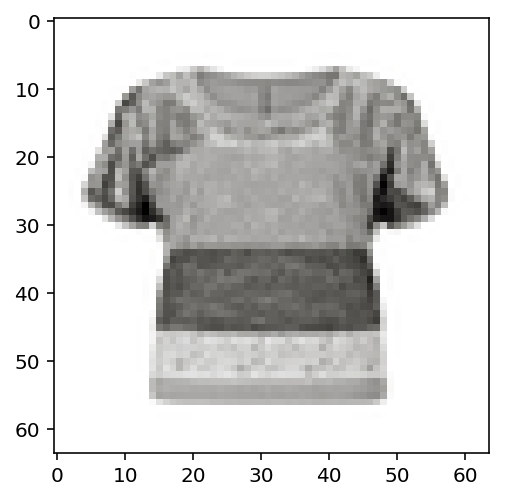

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.imshow(im)  
np.shape(out)